# **TECH CHALLENGE**
# Exploração de dados:

*  Carregue a base de dados e explore suas
características;
*  Analise estatísticas descritivas e visualize distribuições relevantes.

In [104]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
# para deixar todas as saídas com os mesmos valores
import numpy as np
np.random.seed(42)
import os

# Para plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Verificando quantidade de linhas e colunas

In [106]:
dataset.shape

(1338, 7)

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Procurando por nulos no dataset

In [108]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Quantidade de valores de gastos

In [109]:
dataset["charges"].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


## Quantidade de homens e mulheres no dataset

In [110]:
set(dataset['sex'])
dataset['sex'].value_counts()

,count
sex,
male,676
female,662


## Conhecendo um pouco mais o dataset

In [111]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

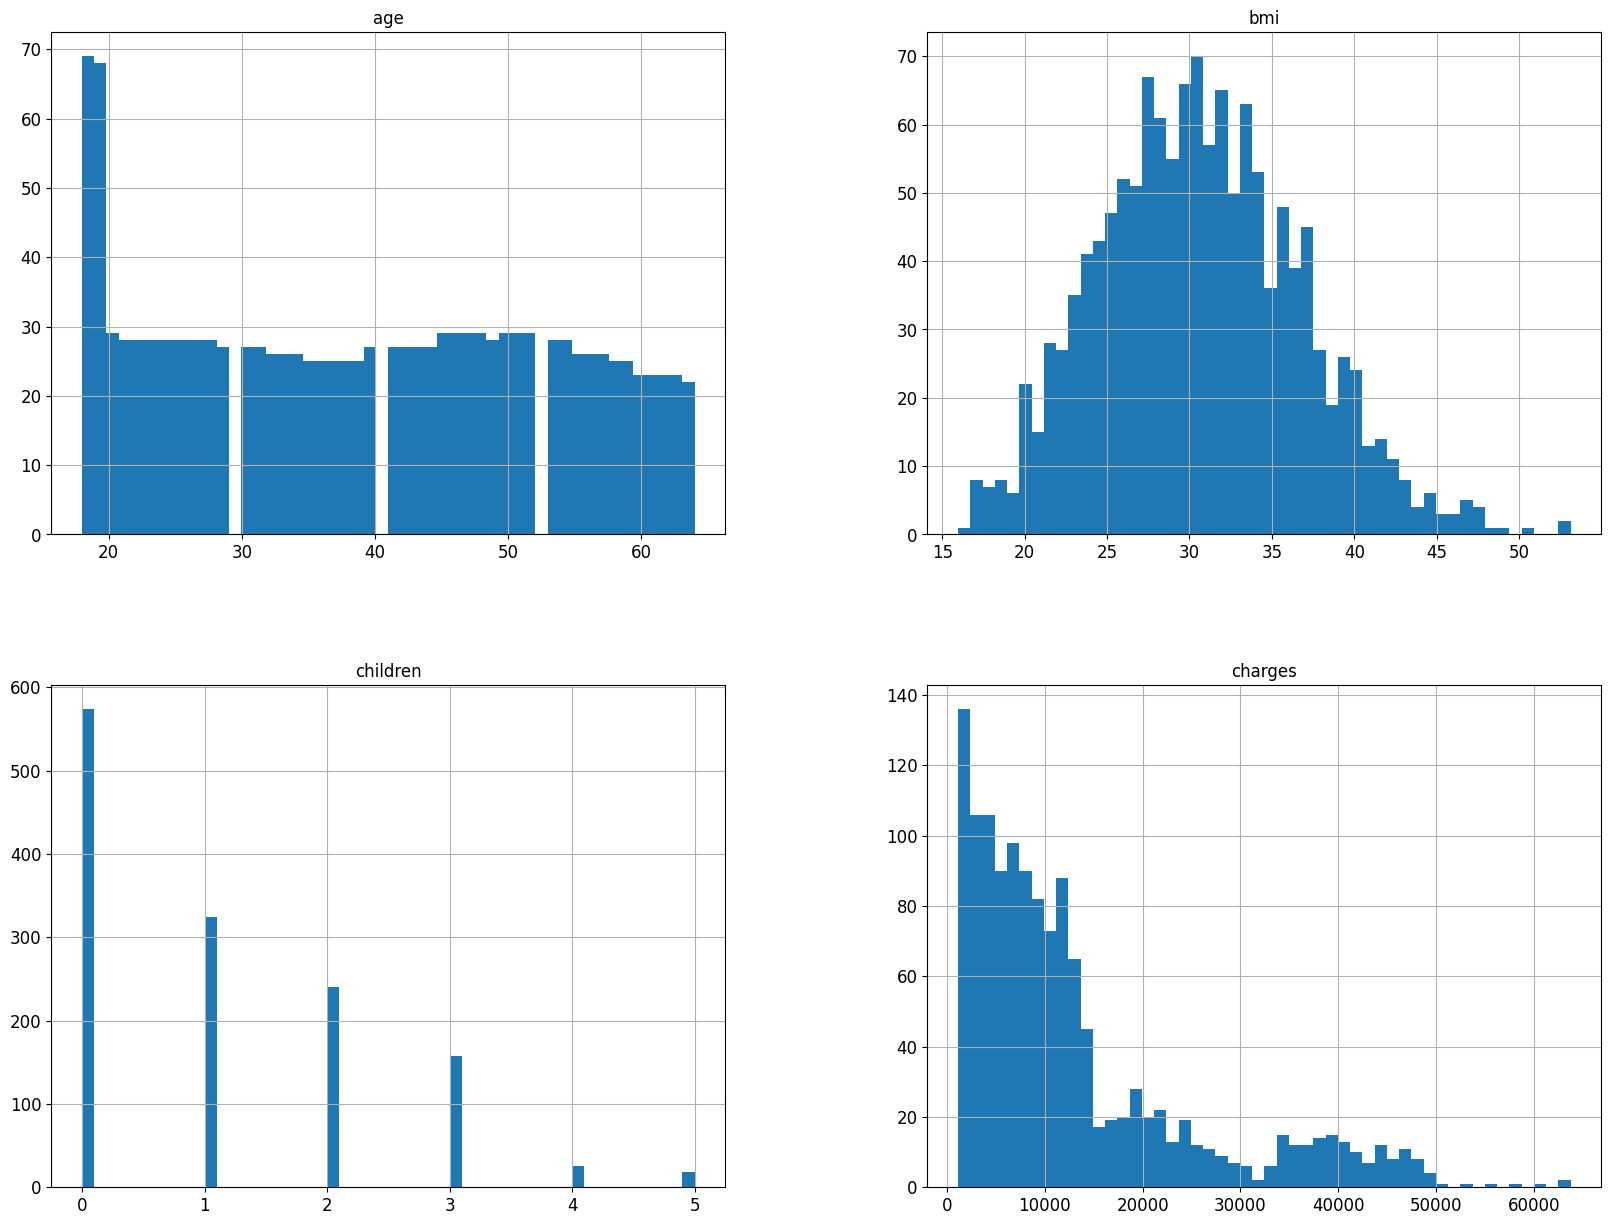

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

<Axes: >

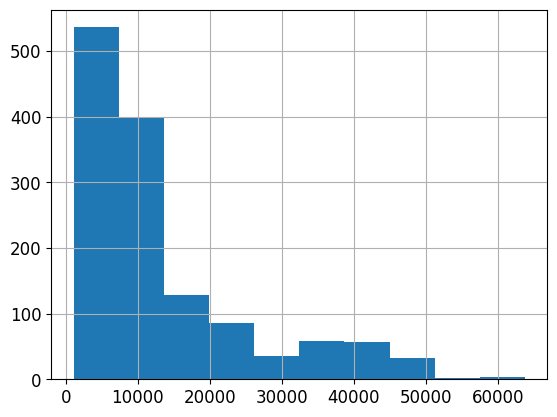

In [113]:
dataset['charges'].hist()

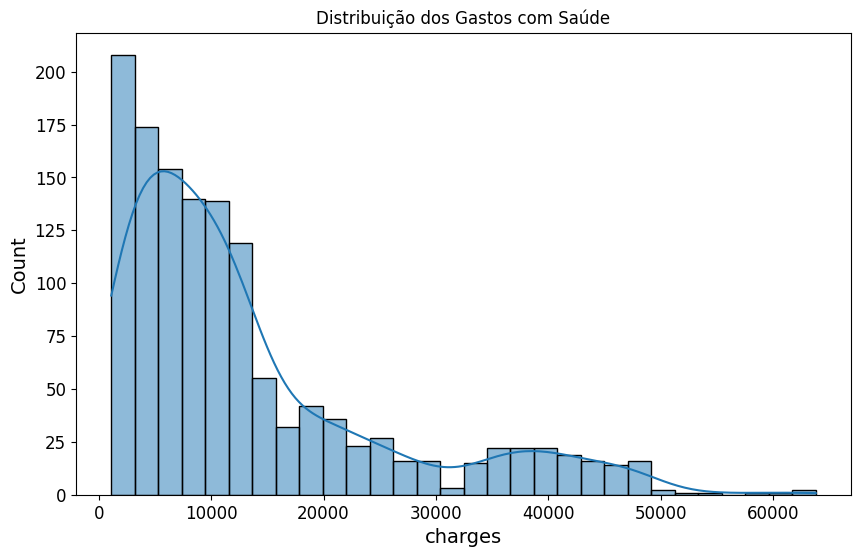

In [114]:
import seaborn as sns

# Visualizar distribuição da variável target (charges)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['charges'], bins=30, kde=True)
plt.title('Distribuição dos Gastos com Saúde')
plt.show()

# Normalizando e Padronizando os dados

1.   Categorizando dados
2.   Trocando dados descritivos por números

In [115]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar features e target
X = dataset.drop('charges', axis=1)
y = dataset['charges']

# Definir colunas categóricas e numéricas
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Criar transformadores
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar pré-processamento
X_processed = preprocessor.fit_transform(X)

## Verificando correlação entre as variáveis

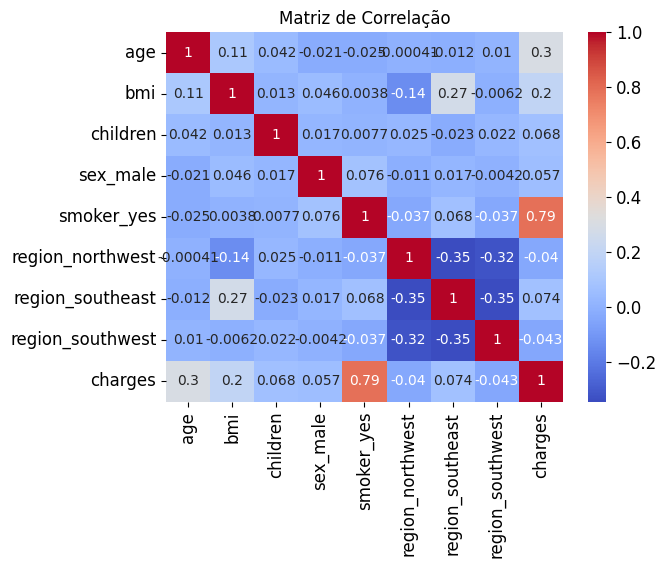

In [116]:
# Correlação entre variáveis numéricas
ds_labels = numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

dataframe = pd.DataFrame(X_processed, columns=ds_labels)
dataframe['charges'] = y

corr = dataframe.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Separando base de testes e de treinamento

In [117]:
from sklearn.model_selection import train_test_split

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

## Aplicando árvore de decisão

Aplica DecisionTreeRegressor

Avalia o método utilizando
*   mean absolute error
*   mean squared error
-   r2 score



In [118]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dtr = DecisionTreeRegressor(random_state=42)

# Treinar o modelo
dtr.fit(X_train, y_train)

# Fazer previsões
y_pred = dtr.predict(X_test)

# Avaliar o modelo
print("Métricas da Árvore de Decisão:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

Métricas da Árvore de Decisão:
MAE: 3074.87
MSE: 40153988.99
R²: 0.7414


## Aplicando Regressão Linear

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Regressão Linear:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

Regressão Linear:
MSE: 33596915.851361476
R²: 0.7835929767120722


In [120]:
some_labels = y_test[:5]
print(list(some_labels))

[9095.06825, 5272.1758, 29330.98315, 9301.89355, 33750.2918]


In [121]:
some_labels = y_pred[:5]
print(list(some_labels))

[np.float64(8969.550274436142), np.float64(7068.747442870876), np.float64(36858.41091154613), np.float64(9454.678500533588), np.float64(26973.17345656349)]


## Aplicando RandomForestRegressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nRandom Forest:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")


Random Forest:
MSE: 20866223.19798948
R²: 0.8655948876523016


In [123]:
some_labels = y_test[:5]
print(list(some_labels))

[9095.06825, 5272.1758, 29330.98315, 9301.89355, 33750.2918]


In [124]:
some_labels = y_pred[:5]
print(list(some_labels))

[np.float64(9630.262601399998), np.float64(5570.196676500002), np.float64(28239.647085500023), np.float64(12468.890214100013), np.float64(34638.2920166)]


In [127]:
# importando PCA da biblioteca sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Instanciando o pca e a quantidade de componentes que desejamos obter
X_transform = StandardScaler().fit_transform(X_processed)
pca = PCA(n_components=2)
# Aplicando PCA nas nossas features
predictions = pca.fit_transform(X_transform)

In [128]:
# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
df_pca = pd.DataFrame(data = predictions,
                  columns = ['PC1', 'PC2'])

target = pd.Series(dataset['charges'], name='charges')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,charges
0,-0.553534,1.555510,16884.92400
1,1.655404,-0.525503,1725.55230
2,1.581891,-0.431678,4449.46200
3,-1.775405,-1.417192,21984.47061
4,-1.285313,-1.360950,3866.85520
...,...,...,...
1333,-1.120861,-1.174623,10600.54830
1334,-0.187025,-0.059301,2205.98080
1335,1.748674,-0.494775,1629.83350
1336,-1.070908,1.736714,2007.94500


In [129]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.19216849 0.16586792]

 Total Variance Explained: 35.8


**O melhor r² foi o de RandomForestRegressor, com 86%**

Não foi aplicado o PCA pois esse dataset possui apenas 7 colunas, e aplicando PCA para 2 colunas a variancia ficou alta.